In [11]:
import pandas as pd
df = pd.read_csv('df_comp12.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df.head()

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
0,0,Richard A Berg,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,2500.0,Republican,Open Seat
1,1,David Camp,House,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,5000.0,Republican,Incumbent
2,2,John Shimkus,House,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,5000.0,Republican,Incumbent
3,3,Lynn Westmoreland,House,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,2000.0,Republican,Incumbent
4,4,Charles Boustany,House,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,2000.0,Republican,Incumbent


In [13]:
#Reduce to Senate
df = df[df['RecipientCommitteeType'].str.contains('Senate', case=False)]

In [14]:
df.head()

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
0,0,Richard A Berg,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,2500.0,Republican,Open Seat
5,5,Josh Mandel,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,5000.0,Republican,Challenger
14,14,Jefferson Sessions,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,1000.0,Republican,NaN
34,34,Scott P Brown,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,5000.0,Republican,Incumbent
46,46,Richard A Berg,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2012-06-19,5000.0,Republican,Open Seat


In [15]:
#Break out the groups filtered by DonorCommitteeNameNormalized first. 
#Create features (columns) for each, then join to 2018 Spreadsheet of candidates
df['DonorOrganization'].isna().sum()

0

In [16]:
#Drop rows without value for DonorCommittee
df = df.dropna(subset=['DonorOrganization'])
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
0,Richard A Berg,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,2500.0,Republican,Open Seat
5,Josh Mandel,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,5000.0,Republican,Challenger
14,Jefferson Sessions,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,1000.0,Republican,NaN
34,Scott P Brown,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2011-11-18,5000.0,Republican,Incumbent
46,Richard A Berg,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2012-06-19,5000.0,Republican,Open Seat


In [26]:
df_Chevron = df[df['DonorOrganization'].str.contains('chevron', case=False)]
df_Chevron

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
55899,Mike Lee,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2011-02-10,1000.0,Republican,NaN
55919,Orrin Hatch,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2011-04-21,2500.0,Republican,Incumbent
55927,John Barrasso,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2011-05-24,5000.0,Republican,Incumbent
55928,Dean Heller,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2011-05-24,5000.0,Republican,Incumbent
55929,John Barrasso,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2011-05-24,2500.0,Republican,Incumbent
55935,Dianne Feinstein,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2011-05-24,1000.0,Democratic,Incumbent
55936,Dianne Feinstein,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2011-05-24,1000.0,Democratic,Incumbent
55944,Roger Wicker,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2011-05-24,2000.0,Republican,NaN
55946,Scott P Brown,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2011-05-03,5000.0,Republican,Incumbent
55947,Bob Corker,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2011-05-03,5000.0,Republican,Incumbent


In [27]:
df_Chevron['TransactionAmount'].sum()
#About 70% of all Congressional donations

254410.0

In [28]:
# get dataframe linking name to total donations by koch
namegroups = df_Chevron.groupby('RecipientCandidateNameNormalized')
df_Chevron_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [29]:
# rename column
df_Chevron_Senate = df_Chevron_Senate.rename(index=str, columns={"TransactionAmount": "Chevron12"})
df_Chevron_Senate

,Chevron12
RecipientCandidateNameNormalized,
W. Akin,241.0
Tommy G Thompson,5000.0
Tom Smith,454.0
Timothy Michael Kaine,250.0
Scott P Brown,12900.0
Roger Wicker,23500.0
Richard Lugar,4750.0
Richard E Mourdock,6546.0
Richard A Berg,10000.0


In [30]:
df_Chevron_Senate['Chevron12'].sum()

254410.0

In [31]:
df_Chevron_Senate.shape

(34, 1)

In [32]:
df_senate = pd.read_excel('senate_env13_12con.xlsx')
df_senate.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch12,MarPet12,MarOil12,EnTrans12,...,Arch12,Cloud12,Drummond12,Lignite12,NAcoal12,OHcoal12,Peabody12,Barrick12,Cliffs12,Newmont12
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,5000,0,0,0,...,1000,0,0,0,0,0,0,7000,0,0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# check if senators appear more than once
(df_senate.RecipientCandidateNameNormalized.value_counts()>1).any()

False

In [34]:
result = pd.merge(df_senate, df_Chevron_Senate, how='left', on='RecipientCandidateNameNormalized')
result['Chevron12']=result['Chevron12'].fillna(0)
result.tail(51)

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch12,MarPet12,MarOil12,EnTrans12,...,Cloud12,Drummond12,Lignite12,NAcoal12,OHcoal12,Peabody12,Barrick12,Cliffs12,Newmont12,Chevron12
49,Senate,MS,Thad Cochran,Republican,NaN,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
50,Senate,MT,Jon Tester,Democratic,NaN,92,0,0,1500,0,...,0,0,0,0,0,0,3500,0,2000,0.0
51,Senate,MT,Max Baucus,Democratic,NaN,85,0,0,0,5000,...,3000,0,0,0,0,0,0,0,0,400.0
52,Senate,NC,Kay R Hagan,Democratic,NaN,85,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
53,Senate,NC,Richard Burr,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
54,Senate,ND,Heidi Heitkamp,Democratic,Open Seat,69,0,0,5000,0,...,0,0,5000,0,0,0,0,0,0,2500.0
55,Senate,ND,John Hoeven,Republican,NaN,23,0,0,0,0,...,0,0,225,1000,0,2500,0,0,0,0.0
56,Senate,NE,Debra S Fischer,Republican,Open Seat,15,0,5000,0,0,...,0,0,0,0,0,0,0,0,0,5000.0
57,Senate,NE,Michael O Johanns,Republican,NaN,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
58,Senate,NH,Jeanne Shaheen,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [35]:
result['Chevron12'].sum()
#About 80% of Koch's Senate donations in the 2016 cycle went towards candidates who won/ remained in Senate
#Notable losers were ...

178300.0

In [36]:
result['Chevron12'].where(result['Chevron12'] > 0).count()
#19 of the 24 candidates they donated to won/ remained in Senate

20

In [74]:
#MARATHON PETROLEUM
df_MarPet = df[df['DonorCommitteeNameNormalized'].str.contains('marathon petroleum', case=False)]
df_MarPet

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO


In [75]:
df_MarPet['TransactionAmount'].sum()
#Marathon Petroleum donated about ..% of Congressional totals in 2016 cycle to Senate. About ..% of count

0.0

In [76]:
# get dataframe linking name to total donations by the Marathon Petroleum
namegroups = df_MarPet.groupby('RecipientCandidateNameNormalized')
df_MarPet_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [77]:
# rename column
df_MarPet_Senate = df_MarPet_Senate.rename(index=str, columns={"TransactionAmount": "MarPet10"})
df_MarPet_Senate

,MarPet10
RecipientCandidateNameNormalized,


In [78]:
df_MarPet_Senate['MarPet10'].sum()

0.0

In [79]:
df_MarPet_Senate.shape

(0, 1)

In [80]:
result2 = pd.merge(result, df_MarPet_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['MarPet10']=result2['MarPet10'].fillna(0)
result2

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0


In [81]:
result2['MarPet10'].sum()
#A little over half of ACTBLUE's Senate donations in the 2016 cycle went towards successful candidates

0.0

In [26]:
result2['MarPet12'].where(result2['MarPet12'] > 0).count()
#49 of the 86 candidates they donated to won/ remained in Senate

12

In [82]:
#MARATHON OIL
df_MarOil = df[df['DonorCommitteeNameNormalized'].str.contains('marathon oil', case=False)]
df_MarOil
print('Marathon Oil Total 2010 Senate donations: ', df_MarOil['TransactionAmount'].sum())
# get dataframe linking name to total donations by MarOil
namegroups = df_MarOil.groupby('RecipientCandidateNameNormalized')
df_MarOil_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_MarOil_Senate = df_MarOil_Senate.rename(index=str, columns={"TransactionAmount": "MarOil10"})
print('Checking Sums after grouping: ', df_MarOil_Senate['MarOil10'].sum())
print('Candidates MarOil donated to: ', df_MarOil_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_MarOil_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['MarOil10']=result2['MarOil10'].fillna(0)
result2

Marathon Oil Total 2010 Senate donations:  189500.0
Checking Sums after grouping:  189500.0
Candidates MarOil donated to:  (41, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0


In [83]:
print('Checking Sums after grouping: ', df_MarOil_Senate['MarOil10'].sum())
print('Candidates MarOil donated to: ', df_MarOil_Senate.shape)

Checking Sums after grouping:  189500.0
Candidates MarOil donated to:  (41, 1)


In [84]:
#ENERGY TRANSFER
df_EnTrans = df[df['DonorCommitteeNameNormalized'].str.contains('Energy Transfer', case=False)]
print('Energy Transfer Total 2010 Senate donations: ', df_EnTrans['TransactionAmount'].sum())
# get dataframe linking name to total donations by MarOil
namegroups = df_EnTrans.groupby('RecipientCandidateNameNormalized')
df_EnTrans_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_EnTrans_Senate = df_EnTrans_Senate.rename(index=str, columns={"TransactionAmount": "EnTrans10"})
print('Checking Sums after grouping: ', df_EnTrans_Senate['EnTrans10'].sum())
print('Candidates EnTrans donated to: ', df_EnTrans_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_EnTrans_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['EnTrans10']=result2['EnTrans10'].fillna(0)
result2

Energy Transfer Total 2010 Senate donations:  9800.0
Checking Sums after grouping:  9800.0
Candidates EnTrans donated to:  (1, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0


In [85]:
#Exxon
df_Exxon = df[df['DonorCommitteeNameNormalized'].str.contains('exxon', case=False)]
print('Exxon Total 2010 Senate donations: ', df_Exxon['TransactionAmount'].sum())
# get dataframe linking name to total donations by MarOil
namegroups = df_Exxon.groupby('RecipientCandidateNameNormalized')
df_Exxon_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Exxon_Senate = df_Exxon_Senate.rename(index=str, columns={"TransactionAmount": "Exxon10"})
print('Checking Sums after grouping: ', df_Exxon_Senate['Exxon10'].sum())
print('Candidates Exxon donated to: ', df_Exxon_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Exxon_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Exxon10']=result2['Exxon10'].fillna(0)
result2

Exxon Total 2010 Senate donations:  278000.0
Checking Sums after grouping:  278000.0
Candidates Exxon donated to:  (41, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,Exxon10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,10000.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,10000.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,10000.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,5000.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,8000.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,0.0


In [86]:
#Occidental
df_Occ = df[df['DonorCommitteeNameNormalized'].str.contains('occidental', case=False)]
print('Occidental Total 2010 Senate donations: ', df_Occ['TransactionAmount'].sum())
# get dataframe linking name to total donations by Occidental
namegroups = df_Occ.groupby('RecipientCandidateNameNormalized')
df_Occ_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Occ_Senate = df_Occ_Senate.rename(index=str, columns={"TransactionAmount": "Occ10"})
print('Checking Sums after grouping: ', df_Occ_Senate['Occ10'].sum())
print('Candidates Occidental donated to: ', df_Occ.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Occ_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Occ10']=result2['Occ10'].fillna(0)
result2

Occidental Total 2010 Senate donations:  110500.0
Checking Sums after grouping:  110500.0
Candidates Occidental donated to:  (79, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,Exxon10,Occ10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,10000.0,10000.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,10000.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,10000.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,5000.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,8000.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
#Conoco
df_Conoco = df[df['DonorCommitteeNameNormalized'].str.contains('conoco', case=False)]
print('ConocoPhillips Total 2010 Senate donations: ', df_Occ['TransactionAmount'].sum())
# get dataframe linking name to total donations by Conoco
namegroups = df_Conoco.groupby('RecipientCandidateNameNormalized')
df_Conoco_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Conoco_Senate = df_Conoco_Senate.rename(index=str, columns={"TransactionAmount": "Conoco10"})
print('Checking Sums after grouping: ', df_Conoco_Senate['Conoco10'].sum())
print('Candidates Conoco donated to: ', df_Conoco.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Conoco_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Conoco10']=result2['Conoco10'].fillna(0)
result2

ConocoPhillips Total 2010 Senate donations:  110500.0
Checking Sums after grouping:  122000.0
Candidates Conoco donated to:  (81, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,Exxon10,Occ10,Conoco10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,10000.0,10000.0,10000.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,10000.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,10000.0,0.0,3000.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,5000.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,8000.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
#PHILLIPS 66
df_PhilSix = df[df['DonorCommitteeNameNormalized'].str.contains('phillips 66', case=False)]
print('Phillips66 Total 2010 Senate donations: ', df_PhilSix['TransactionAmount'].sum())
# get dataframe linking name to total donations by Phillips66
namegroups = df_PhilSix.groupby('RecipientCandidateNameNormalized')
df_PhilSix_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_PhilSix_Senate = df_PhilSix_Senate.rename(index=str, columns={"TransactionAmount": "PhilSix10"})
print('Checking Sums after grouping: ', df_PhilSix_Senate['PhilSix10'].sum())
print('Candidates Phillips66 donated to: ', df_PhilSix.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_PhilSix_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['PhilSix10']=result2['PhilSix10'].fillna(0)
result2

Phillips66 Total 2010 Senate donations:  0.0
Checking Sums after grouping:  0.0
Candidates Phillips66 donated to:  (0, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,Exxon10,Occ10,Conoco10,PhilSix10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,10000.0,10000.0,10000.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,10000.0,0.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,10000.0,0.0,3000.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,8000.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
#VALERO
df_Valero = df[df['DonorCommitteeNameNormalized'].str.contains('valero', case=False)]
print('Valero Total 2010 Senate donations: ', df_Valero['TransactionAmount'].sum())
# get dataframe linking name to total donations by Valero
namegroups = df_Valero.groupby('RecipientCandidateNameNormalized')
df_Valero_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Valero_Senate = df_Valero_Senate.rename(index=str, columns={"TransactionAmount": "Valero10"})
print('Checking Sums after grouping: ', df_Valero_Senate['Valero10'].sum())
print('Candidates Valero donated to: ', df_Valero.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Valero_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Valero10']=result2['Valero10'].fillna(0)
result2

Valero Total 2010 Senate donations:  153000.0
Checking Sums after grouping:  153000.0
Candidates Valero donated to:  (46, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,Exxon10,Occ10,Conoco10,PhilSix10,Valero10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,10000.0,10000.0,10000.0,0.0,10000.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,10000.0,0.0,0.0,0.0,2500.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,10000.0,0.0,3000.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,8000.0,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
#ARCH COAL
df_Arch = df[df['DonorCommitteeNameNormalized'].str.contains('arch coal', case=False)]
print('Arch Coal Total 2010 Senate donations: ', df_Arch['TransactionAmount'].sum())
# get dataframe linking name to total donations by Arch
namegroups = df_Arch.groupby('RecipientCandidateNameNormalized')
df_Arch_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Arch_Senate = df_Arch_Senate.rename(index=str, columns={"TransactionAmount": "Arch10"})
print('Checking Sums after grouping: ', df_Arch_Senate['Arch10'].sum())
print('Candidates Arch Coal donated to: ', df_Arch.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Arch_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Arch10']=result2['Arch10'].fillna(0)
result2

Arch Coal Total 2010 Senate donations:  141500.0
Checking Sums after grouping:  141500.0
Candidates Arch Coal donated to:  (86, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,Exxon10,Occ10,Conoco10,PhilSix10,Valero10,Arch10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,10000.0,10000.0,10000.0,0.0,10000.0,4000.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,10000.0,0.0,0.0,0.0,2500.0,1000.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,10000.0,0.0,3000.0,0.0,0.0,3500.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,8000.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
#CLOUD PEAK ENERGY
df_Cloud = df[df['DonorCommitteeNameNormalized'].str.contains('cloud peak energy', case=False)]
print('Cloud Peak Energy Total 2010 Senate donations: ', df_Cloud['TransactionAmount'].sum())
# get dataframe linking name to total donations by Cloud Peak Energy
namegroups = df_Cloud.groupby('RecipientCandidateNameNormalized')
df_Cloud_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Cloud_Senate = df_Cloud_Senate.rename(index=str, columns={"TransactionAmount": "Cloud10"})
print('Checking Sums after grouping: ', df_Cloud_Senate['Cloud10'].sum())
print('Candidates Cloud Peak Energy donated to: ', df_Cloud.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Cloud_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Cloud10']=result2['Cloud10'].fillna(0)
result2

Cloud Peak Energy Total 2010 Senate donations:  1000.0
Checking Sums after grouping:  1000.0
Candidates Cloud Peak Energy donated to:  (1, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,Exxon10,Occ10,Conoco10,PhilSix10,Valero10,Arch10,Cloud10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,10000.0,10000.0,10000.0,0.0,10000.0,4000.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,10000.0,0.0,0.0,0.0,2500.0,1000.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,10000.0,0.0,3000.0,0.0,0.0,3500.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
#DRUMMOND COMPANY
df_Drummond = df[df['DonorCommitteeNameNormalized'].str.contains('drummond company', case=False)]
print('Drummond Company Total 2010 Senate donations: ', df_Drummond['TransactionAmount'].sum())
# get dataframe linking name to total donations by Drummond
namegroups = df_Drummond.groupby('RecipientCandidateNameNormalized')
df_Drummond_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Drummond_Senate = df_Drummond_Senate.rename(index=str, columns={"TransactionAmount": "Drummond10"})
print('Checking Sums after grouping: ', df_Drummond_Senate['Drummond10'].sum())
print('Candidates Drummond donated to: ', df_Drummond.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Drummond_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Drummond10']=result2['Drummond10'].fillna(0)
result2

Drummond Company Total 2010 Senate donations:  24000.0
Checking Sums after grouping:  24000.0
Candidates Drummond donated to:  (13, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,Exxon10,Occ10,Conoco10,PhilSix10,Valero10,Arch10,Cloud10,Drummond10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,10000.0,10000.0,10000.0,0.0,10000.0,4000.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,10000.0,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,10000.0,0.0,3000.0,0.0,0.0,3500.0,0.0,7000.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
#LIGNITE ENERGY
df_Lignite = df[df['DonorCommitteeNameNormalized'].str.contains('lignite energy', case=False)]
print('Lignite Energy Total 2010 Senate donations: ', df_Lignite['TransactionAmount'].sum())
# get dataframe linking name to total donations by Lignite
namegroups = df_Lignite.groupby('RecipientCandidateNameNormalized')
df_Lignite_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Lignite_Senate = df_Lignite_Senate.rename(index=str, columns={"TransactionAmount": "Lignite10"})
print('Checking Sums after grouping: ', df_Lignite_Senate['Lignite10'].sum())
print('Candidates Lignite donated to: ', df_Lignite.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Lignite_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Lignite10']=result2['Lignite10'].fillna(0)
result2

Lignite Energy Total 2010 Senate donations:  4000.0
Checking Sums after grouping:  4000.0
Candidates Lignite donated to:  (7, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,Exxon10,Occ10,Conoco10,PhilSix10,Valero10,Arch10,Cloud10,Drummond10,Lignite10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,10000.0,10000.0,10000.0,0.0,10000.0,4000.0,0.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,10000.0,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,10000.0,0.0,3000.0,0.0,0.0,3500.0,0.0,7000.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
#NORTH AMERICAN COAL'
df_NAcoal = df[df['DonorCommitteeNameNormalized'].str.contains('north american coal', case=False)]
print('North American Coal Corp Total 2010 Senate donations: ', df_NAcoal['TransactionAmount'].sum())
# get dataframe linking name to total donations by Lignite
namegroups = df_NAcoal.groupby('RecipientCandidateNameNormalized')
df_NAcoal_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_NAcoal_Senate = df_NAcoal_Senate.rename(index=str, columns={"TransactionAmount": "NAcoal10"})
print('Checking Sums after grouping: ', df_NAcoal_Senate['NAcoal10'].sum())
print('Candidates NA Coal donated to: ', df_NAcoal.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_NAcoal_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['NAcoal10']=result2['NAcoal10'].fillna(0)
result2

North American Coal Corp Total 2010 Senate donations:  5000.0
Checking Sums after grouping:  5000.0
Candidates NA Coal donated to:  (1, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,Exxon10,Occ10,Conoco10,PhilSix10,Valero10,Arch10,Cloud10,Drummond10,Lignite10,NAcoal10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,10000.0,10000.0,10000.0,0.0,10000.0,4000.0,0.0,0.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,10000.0,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,10000.0,0.0,3000.0,0.0,0.0,3500.0,0.0,7000.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
#OHIO COAL'
df_OHcoal = df[df['DonorCommitteeNameNormalized'].str.contains('ohio coal', case=False)]
print('Ohio Coal Corp Total 2010 Senate donations: ', df_NAcoal['TransactionAmount'].sum())
# get dataframe linking name to total donations by Lignite
namegroups = df_OHcoal.groupby('RecipientCandidateNameNormalized')
df_OHcoal_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_OHcoal_Senate = df_OHcoal_Senate.rename(index=str, columns={"TransactionAmount": "OHcoal10"})
print('Checking Sums after grouping: ', df_OHcoal_Senate['OHcoal10'].sum())
print('Candidates OH Coal donated to: ', df_OHcoal.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_OHcoal_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['OHcoal10']=result2['OHcoal10'].fillna(0)
result2

Ohio Coal Corp Total 2010 Senate donations:  5000.0
Checking Sums after grouping:  3500.0
Candidates OH Coal donated to:  (8, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Occ10,Conoco10,PhilSix10,Valero10,Arch10,Cloud10,Drummond10,Lignite10,NAcoal10,OHcoal10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,...,10000.0,10000.0,0.0,10000.0,4000.0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,...,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,...,0.0,3000.0,0.0,0.0,3500.0,0.0,7000.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
#PEABODY ENERGY'
df_Peabody = df[df['DonorCommitteeNameNormalized'].str.contains('peabody energy', case=False)]
print('Peabody Energy Total 2010 Senate donations: ', df_Peabody['TransactionAmount'].sum())
# get dataframe linking name to total donations by Peabody
namegroups = df_Peabody.groupby('RecipientCandidateNameNormalized')
df_Peabody_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Peabody_Senate = df_Peabody_Senate.rename(index=str, columns={"TransactionAmount": "Peabody10"})
print('Checking Sums after grouping: ', df_Peabody_Senate['Peabody10'].sum())
print('Candidates Peabody Energy donated to: ', df_Peabody.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Peabody_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Peabody10']=result2['Peabody10'].fillna(0)
result2

Peabody Energy Total 2010 Senate donations:  78300.0
Checking Sums after grouping:  78300.0
Candidates Peabody Energy donated to:  (35, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Conoco10,PhilSix10,Valero10,Arch10,Cloud10,Drummond10,Lignite10,NAcoal10,OHcoal10,Peabody10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,...,10000.0,0.0,10000.0,4000.0,0.0,0.0,0.0,0.0,0.0,4500.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,...,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,...,3000.0,0.0,0.0,3500.0,0.0,7000.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
#BARRICK GOLDSTRIKE MINES
df_Barrick = df[df['DonorCommitteeNameNormalized'].str.contains('barrick gold', case=False)]
print('Barrick Goldstrike Total 2010 Senate donations: ', df_Barrick['TransactionAmount'].sum())
# get dataframe linking name to total donations by Barrick
namegroups = df_Barrick.groupby('RecipientCandidateNameNormalized')
df_Barrick_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Barrick_Senate = df_Barrick_Senate.rename(index=str, columns={"TransactionAmount": "Barrick10"})
print('Checking Sums after grouping: ', df_Barrick_Senate['Barrick10'].sum())
print('Candidates Barrick Goldstrike donated to: ', df_Barrick.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Barrick_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Barrick10']=result2['Barrick10'].fillna(0)
result2

Barrick Goldstrike Total 2010 Senate donations:  40500.0
Checking Sums after grouping:  40500.0
Candidates Barrick Goldstrike donated to:  (20, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,PhilSix10,Valero10,Arch10,Cloud10,Drummond10,Lignite10,NAcoal10,OHcoal10,Peabody10,Barrick10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,...,0.0,10000.0,4000.0,0.0,0.0,0.0,0.0,0.0,4500.0,15000.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,...,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,...,0.0,0.0,3500.0,0.0,7000.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
#CLEVELAND CLIFFS
df_Cliffs = df[df['DonorCommitteeNameNormalized'].str.contains('cliffs natural', case=False)]
print('Cleveland Cliffs Total 2010 Senate donations: ', df_Cliffs['TransactionAmount'].sum())
# get dataframe linking name to total donations by Cleveland Cliffs
namegroups = df_Cliffs.groupby('RecipientCandidateNameNormalized')
df_Cliffs_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Cliffs_Senate = df_Cliffs_Senate.rename(index=str, columns={"TransactionAmount": "Cliffs10"})
print('Checking Sums after grouping: ', df_Cliffs_Senate['Cliffs10'].sum())
print('Candidates Cleveland Cliffs donated to: ', df_Cliffs.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Cliffs_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Cliffs10']=result2['Cliffs10'].fillna(0)
result2

Cleveland Cliffs Total 2010 Senate donations:  15000.0
Checking Sums after grouping:  15000.0
Candidates Cleveland Cliffs donated to:  (9, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Valero10,Arch10,Cloud10,Drummond10,Lignite10,NAcoal10,OHcoal10,Peabody10,Barrick10,Cliffs10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,...,10000.0,4000.0,0.0,0.0,0.0,0.0,0.0,4500.0,15000.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,...,2500.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,...,0.0,3500.0,0.0,7000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
#NEWMONT MINING
df_Newmont = df[df['DonorCommitteeNameNormalized'].str.contains('newmont', case=False)]
print('Newmont Mining Total 2010 Senate donations: ', df_Newmont['TransactionAmount'].sum())
# get dataframe linking name to total donations by Newmont
namegroups = df_Newmont.groupby('RecipientCandidateNameNormalized')
df_Newmont_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Newmont_Senate = df_Newmont_Senate.rename(index=str, columns={"TransactionAmount": "Newmont10"})
print('Checking Sums after grouping: ', df_Newmont_Senate['Newmont10'].sum())
print('Candidates Newmont donated to: ', df_Newmont.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Newmont_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Newmont10']=result2['Newmont10'].fillna(0)
result2

Newmont Mining Total 2010 Senate donations:  18500.0
Checking Sums after grouping:  18500.0
Candidates Newmont donated to:  (11, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Arch10,Cloud10,Drummond10,Lignite10,NAcoal10,OHcoal10,Peabody10,Barrick10,Cliffs10,Newmont10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000.0,0.0,5000.0,9800.0,...,4000.0,0.0,0.0,0.0,0.0,0.0,4500.0,15000.0,0.0,3500.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0.0,0.0,2000.0,0.0,...,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000.0,0.0,0.0,0.0,...,3500.0,0.0,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0,0.0,0.0,...,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
result2.to_excel('senate_env13_10con.xlsx')

In [101]:
result = pd.read_excel('senate_env13.xlsx')
result

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Lisa Murkowski,Republican,NaN,38
1,Senate,AK,Mark Begich,Democratic,NaN,77
2,Senate,AL,Jefferson Sessions,Republican,NaN,15
3,Senate,AL,Richard Shelby,Democratic,NaN,23
4,Senate,AR,John Boozman,Republican,NaN,15
5,Senate,AR,Mark Pryor,Democratic,NaN,54
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23
7,Senate,AZ,John Mccain,Republican,Incumbent,31
8,Senate,CA,Barbara Boxer,Democratic,NaN,100
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92


In [102]:
#LEAGUE OF CONSERVATION VOTERS
df_LCV = df[df['DonorCommitteeNameNormalized'].str.contains('league of conservation', case=False)]
print('League of Conservation Voters Total 2010 Senate donations: ', df_LCV['TransactionAmount'].sum())
# get dataframe linking name to total donations by LCV
namegroups = df_LCV.groupby('RecipientCandidateNameNormalized')
df_LCV_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_LCV_Senate = df_LCV_Senate.rename(index=str, columns={"TransactionAmount": "LCV10"})
print('Checking Sums after grouping: ', df_LCV_Senate['LCV10'].sum())
print('Candidates League of Conservation Voters donated to: ', df_LCV.shape)
# merging with earlier spreadsheet
result = pd.merge(result, df_LCV_Senate, how='left', on='RecipientCandidateNameNormalized')
result['LCV10']=result['LCV10'].fillna(0)
result

League of Conservation Voters Total 2010 Senate donations:  343099.0
Checking Sums after grouping:  343099.0
Candidates League of Conservation Voters donated to:  (306, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,500.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,67468.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0


In [103]:
#SIERRA CLUB
df_Sierra = df[df['DonorCommitteeNameNormalized'].str.contains('sierra club', case=False)]
print('Sierra Club Total 2010 Senate donations: ', df_Sierra['TransactionAmount'].sum())
# get dataframe linking name to total donations by Sierra Club
namegroups = df_Sierra.groupby('RecipientCandidateNameNormalized')
df_Sierra_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Sierra_Senate = df_Sierra_Senate.rename(index=str, columns={"TransactionAmount": "Sierra10"})
print('Checking Sums after grouping: ', df_Sierra_Senate['Sierra10'].sum())
print('Candidates Sierra Club donated to: ', df_Sierra.shape)
# merging with earlier spreadsheet
result = pd.merge(result, df_Sierra_Senate, how='left', on='RecipientCandidateNameNormalized')
result['Sierra10']=result['Sierra10'].fillna(0)
result

Sierra Club Total 2010 Senate donations:  77165.0
Checking Sums after grouping:  77165.0
Candidates Sierra Club donated to:  (74, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV10,Sierra10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,500.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,67468.0,1340.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0.0,0.0


In [104]:
result.to_excel('senate_env13_10pro.xlsx')

In [2]:
import pandas as pd 
df_env12 = pd.read_excel('senate_env12.xlsx')
df_env12.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Lisa Murkowski,Republican,NaN,38
1,Senate,AK,Mark Begich,Democratic,NaN,77
2,Senate,AL,Jefferson Sessions,Republican,NaN,15
3,Senate,AL,Richard Shelby,Democratic,NaN,23
4,Senate,AR,John Boozman,Republican,NaN,15


In [3]:
df_env12[df_env12['RecipientCandidateParty'].str.contains('Independent', case=False)]

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
40,Senate,ME,Angus Stanley King Jr,Independent,Open Seat,92
90,Senate,VT,Bernard Sanders,Independent,Open Seat,100


In [18]:
#df_env12(['RecipientCandidateParty']).str.replace('Independent', 'Democratic', regex=False)
df_env12 = df_env12.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df_env12.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Lisa Murkowski,Republican,NaN,38
1,Senate,AK,Mark Begich,Democratic,NaN,77
2,Senate,AL,Jefferson Sessions,Republican,NaN,15
3,Senate,AL,Richard Shelby,Democratic,NaN,23
4,Senate,AR,John Boozman,Republican,NaN,15


In [55]:
df_env18 = pd.read_excel('senate_env18.xlsx')
df_env18.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,ACTBLUE16,ClubGrowth16,SenCons16,Koch16,Exxon16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,0,0,8000
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,0,0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,10000,10000
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,10000,10000


In [56]:
df_env18 = df_env18.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df_env18.nunique()

RecipientCandidateOffice              1
RecipientCandidateOfficeState        50
RecipientCandidateNameNormalized    100
RecipientCandidateParty               2
RecipientCandidateICO                 3
LCV_Score                            12
LeagueOfConservation16               17
ACTBLUE16                            50
ClubGrowth16                         14
SenCons16                             2
Koch16                                7
Exxon16                               8
dtype: int64

In [59]:
X12_Rep = [df_env12['LCV_Score'].values[df_env12['RecipientCandidateParty']=='Republican']]
len(X12_Rep[0])
X12_Rep = X12_Rep[0]

In [60]:
X12_Dem = [df_env12['LCV_Score'].values[df_env12['RecipientCandidateParty']=='Democratic']]
len(X12_Dem[0])
X12_Dem = X12_Dem[0]

In [61]:
X18_Rep = [df_env18['LCV_Score'].values[df_env18['RecipientCandidateParty']=='Republican']]
len(X18_Rep[0])
X18_Rep = X18_Rep[0]

In [62]:
X18_Dem = [df_env18['LCV_Score'].values[df_env18['RecipientCandidateParty']=='Democratic']]
len(X18_Dem[0])
X18_Dem = X18_Dem[0]

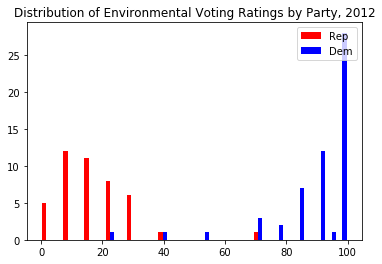

In [82]:
import numpy as np
import matplotlib.pyplot as plt
#plt.hist(X12_Rep, 20, density=True, facecolor='r', alpha=0.75)
#fig, ax = plt.subplots()
#ax.scatter(x, y, c=z, s=100, edgecolor='')
#pyplot.hist(x, bins, alpha=0.5, label='x')
#pyplot.hist(y, bins, alpha=0.5, label='y')
#pyplot.legend(loc='upper right')
#pyplot.show()
bins = np.linspace(0, 100, 30)
colors = ['r','b']
plt.hist([X12_Rep, X12_Dem], bins, color=colors, label=['Rep', 'Dem'])
plt.title('Distribution of Environmental Voting Ratings by Party, 2012')
plt.legend(loc='upper right')
plt.show()

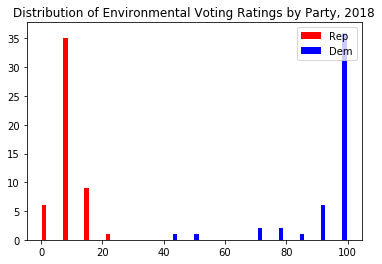

In [83]:
bins = np.linspace(0, 100, 30)
plt.hist([X18_Rep, X18_Dem], bins, color=colors, label=['Rep', 'Dem'])
plt.title('Distribution of Environmental Voting Ratings by Party, 2018')
plt.legend(loc='upper right')
plt.show()